# Time_Series_Assignment_Python

The data contains monthly sales (in million USD) of a leading processed food manufacturer in USA. Data for 3 business units, from February 2015 to January 2018, is provided in the same file.


Columns – Year, Month, BU1, BU2, BU3

Number of observations – 36 for each business **unit**

In [ ]:
!pip install arch
!pip install pmdarima

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from arch.unitroot import ADF
from statsmodels.tsa.statespace.tools import diff
from pmdarima.arima.utils import ndiffs
import pmdarima as pm
from statsmodels.stats.diagnostic import acorr_ljungbox

# Question 1. Import ‘USA Firm Sales’ data in Python
---

In [ ]:
salesdata = pd.read_csv("/content/USA FIRM SALES DATA.csv")
salesdata

,Year,Month,BU1,BU2,BU3
0,2015,February,125.1,115.5,113.8
1,2015,March,123.6,115.7,113.8
2,2015,April,123.1,116.5,114.0
3,2015,May,123.1,117.7,114.1
4,2015,June,123.4,118.3,114.7
5,2015,July,124.0,118.7,115.1
6,2015,August,125.0,119.2,116.1
7,2015,September,127.3,119.8,117.0
8,2015,October,128.2,120.1,117.2
9,2015,November,130.3,120.6,117.2


# Question 2. Create time series objects of the data

---
 The start date is February 2015, and the end date is January 2018. Since the data is monthly, the frequency will be M.

In [ ]:
# Create a date range for the time series
date_range = pd.date_range(start='2015-02', end='2018-01', freq='M')

# Business Unit 1
sales_BU1 = pd.Series(salesdata['BU1'].values, index=date_range)

# Business Unit 2
sales_BU2 = pd.Series(salesdata['BU2'].values, index=date_range)

# Business Unit 3
sales_BU3 = pd.Series(salesdata['BU3'].values, index=date_range)

#Question 3. Check for stationarity for each of the three series
---
Checking for stationarity in each of the three time series plotting the series and their autocorrelation function (ACF).

Also performing the Augmented Dickey-Fuller (ADF) test.

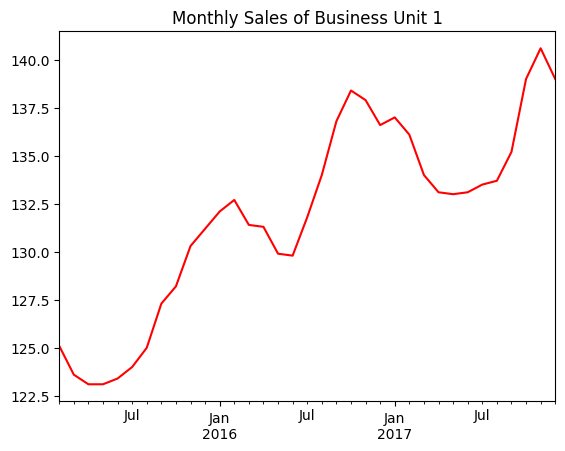

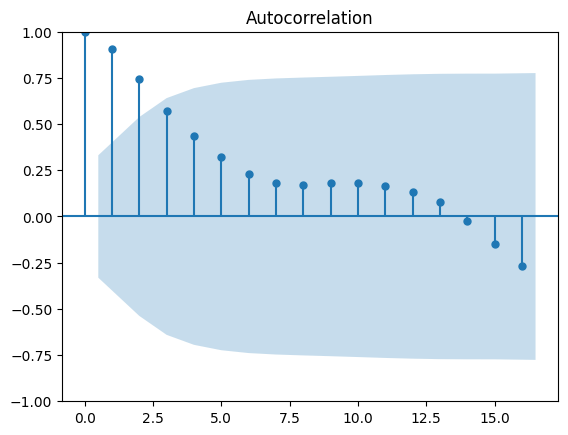

Test Statistic,1.683
P-value,0.978
Lags,0


In [ ]:
# Plotting Business Unit 1
sales_BU1.plot(color='red', title ="Monthly Sales of Business Unit 1")
plot_acf(sales_BU1)
plt.show()

adf = ADF(sales_BU1,lags=0,trend='n')
adf.summary()



Comment:
A slow decaying ACF suggests non-stationarity.

The test statistic (1.683) is much higher than all the critical values at the 1%, 5%, and 10% levels.
This indicates that the null hypothesis cannot be rejected.
Hence, Time series is non-stationary.

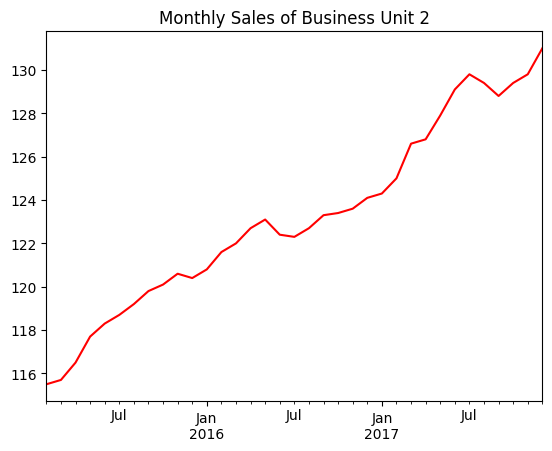

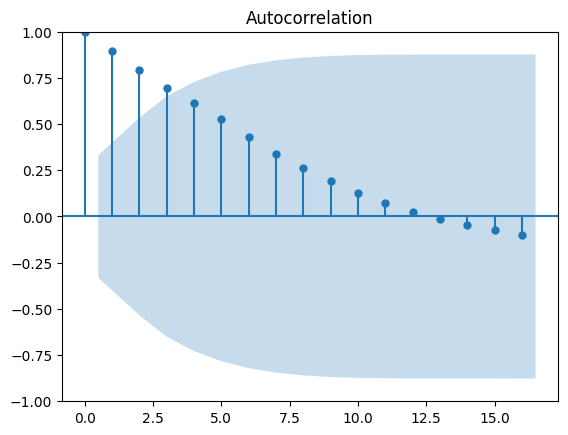

Test Statistic,5.295
P-value,1.000
Lags,0


In [ ]:
# Plotting Business Unit 2
sales_BU2.plot(color='red', title ="Monthly Sales of Business Unit 2")
plot_acf(sales_BU2)
plt.show()

adf = ADF(sales_BU2,lags=0,trend='n')
adf.summary()

Comment:
A slow decaying ACF suggests non-stationarity.

The test statistic (5.295) is much higher than all the critical values at the 1%, 5%, and 10% levels.
This indicates that the null hypothesis cannot be rejected.
Hence, Time series is non-stationary.

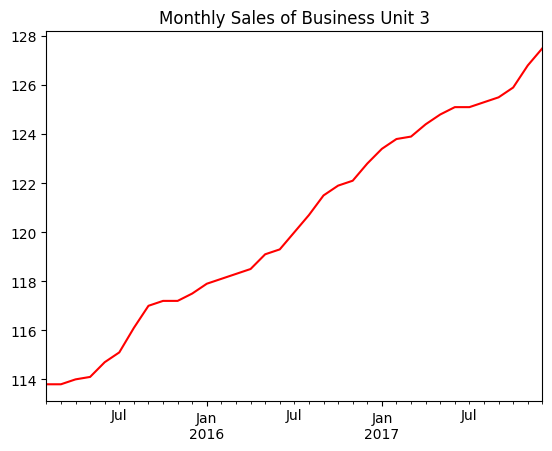

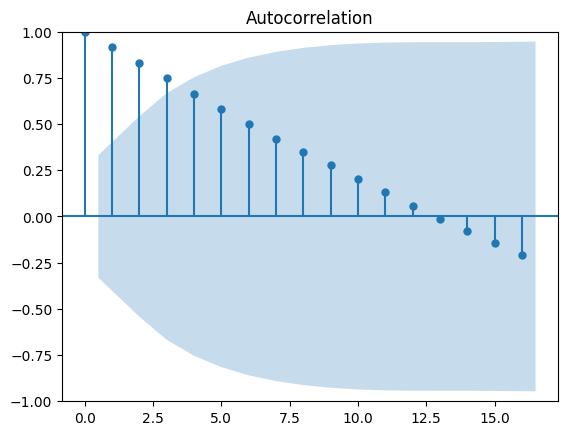

Test Statistic,8.486
P-value,1.000
Lags,0


In [ ]:
# Plotting Business Unit 3
sales_BU3.plot(color='red', title ="Monthly Sales of Business Unit 3")
plot_acf(sales_BU3)
plt.show()

adf = ADF(sales_BU3,lags=0,trend='n')
adf.summary()

Comment:
A slow decaying ACF suggests non-stationarity.

The test statistic (8.486) is much higher than all the critical values at the 1%, 5%, and 10% levels.
This indicates that the null hypothesis cannot be rejected.
Hence, Time series is non-stationary.

In [ ]:
diffs = ndiffs(sales_BU1)
print("Number of differences needed sales_BU1:", diffs)

diffs = ndiffs(sales_BU2)
print("Number of differences needed sales_BU2:", diffs)

diffs = ndiffs(sales_BU3)
print("Number of differences needed sales_BU3:", diffs)

Number of differences needed sales_BU1: 1
Number of differences needed sales_BU2: 1
Number of differences needed sales_BU3: 1


Timeseries should be differenced at least 1 time to achieve stationarity.

Based on diferent trials I have seen that to achivie stationarity the following is needed:

Timeseries sales_BU1 has been differenced 2 time
Timeseries sales_BU2 has been differenced 2 time
Timeseries sales_BU4 has been differenced 2 time

Note: these are different than the values founded in R. Why?

Test Statistic,-5.034
P-value,0.000
Lags,0


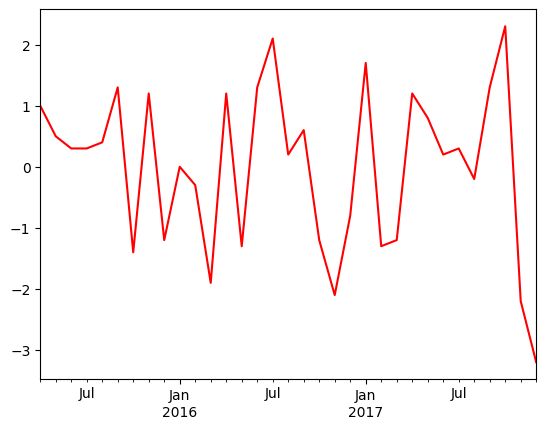

In [ ]:
sales_BU1_diff1 = diff(sales_BU1)
sales_BU1_diff2 = diff(sales_BU1_diff1)
sales_BU1_diff2.plot(color='red')
adf = ADF(sales_BU1_diff2,lags=0,trend='n')
adf.summary()

Test Statistic,-7.080
P-value,0.000
Lags,0


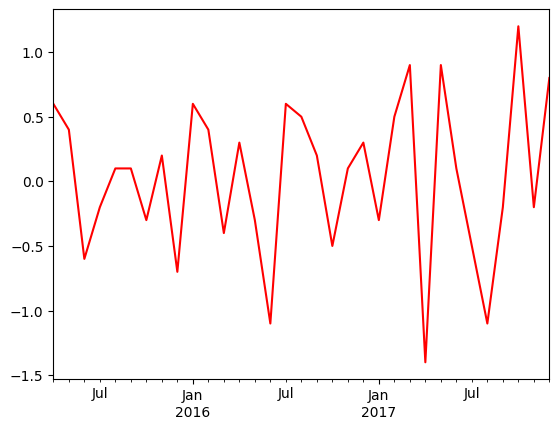

In [ ]:
sales_BU2_diff1 = diff(sales_BU2)
sales_BU2_diff2 = diff(sales_BU2_diff1)
sales_BU2_diff2.plot(color='red')
adf = ADF(sales_BU2_diff2,lags=0,trend='n')
adf.summary()

Test Statistic,-7.121
P-value,0.000
Lags,0


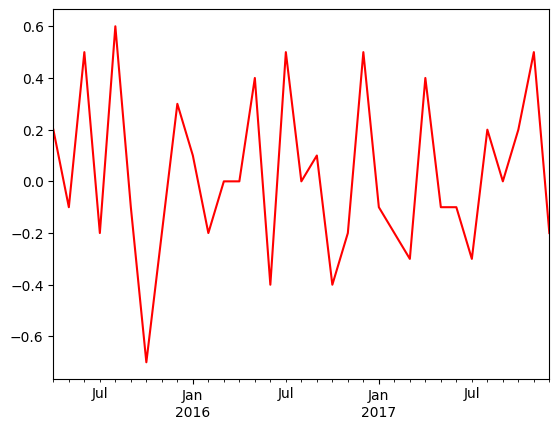

In [ ]:
sales_BU3_diff1 = diff(sales_BU3)
sales_BU3_diff2 = diff(sales_BU3_diff1)
sales_BU3_diff2.plot(color='red')
adf = ADF(sales_BU3_diff2,lags=0,trend='n')
adf.summary()

Comparing the test statistic with the critical values, to make a decision about the stationarity of the series.

Comment BU1:
The value of the test statistic is less than 5% critical value. Hence, Stationarity is achieved with 2nd order difference.

Comment BU2:
The value of the test statistic is than 5% critical value. Hence, Stationarity is achieved with 2nd order difference.

Comment BU3:
The value of the test statistic is less than 5% critical value. Hence, Stationarity is achieved with 2nd order difference.

# Question 4. Obtain best model for each BU.

---

Using the ACF and PACF plots for the differenced series of the three business units sales data to define the parameters p, q, P, Q.


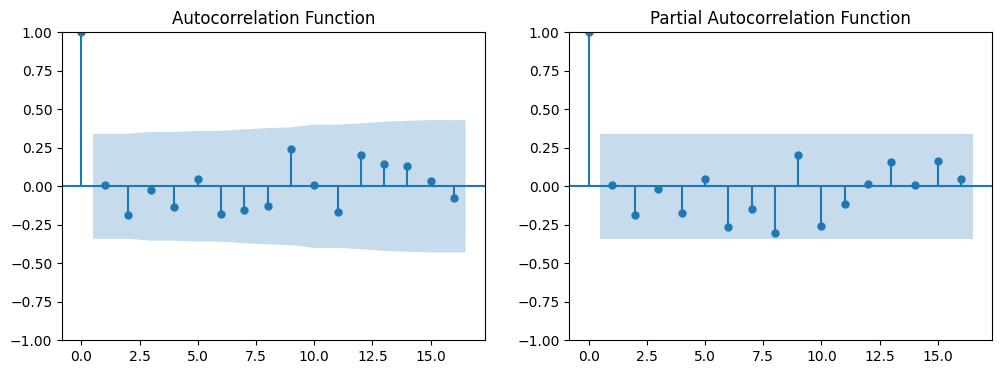

In [ ]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(sales_BU1_diff2, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# PACF plot
plot_pacf(sales_BU1_diff2, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.show()

Comment:

ACF Plot:  We can estimate 1 MA terms, since we have lag 1 out of the confidence interval, and lag 2 is in the blue area.

PACF Plot: looking at the PACF plot above, we can estimate to use 1 AR terms for our model, since lag is in the blue area.

There is hint of seasonality so P and Q are choosen to be 1. The auto_arima function uses a stepwise search algorithm to find the best model. In this way, the algorithm can more effectively explore the parameter space.
This approach allows for more efficient exploration.


max.p=2: PACF cuts off after lag 1, suggesting AR(1). Chosen p=2

max.q=2: ACF cuts off after lag 1, suggesting MA(1). Chosen q=2

max.P=1: There is hint of seasonality so P and Q are choosen to be 1.

max.Q=1: There is hint of seasonality so P and Q are choosen to be 1.

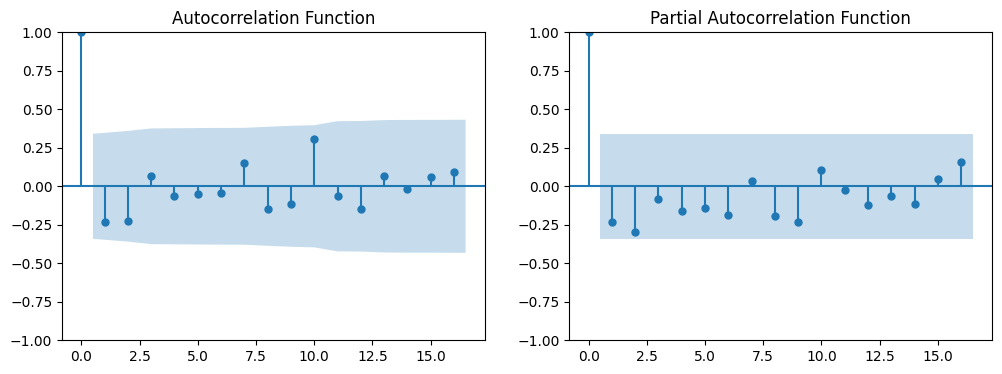

In [ ]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(sales_BU2_diff2, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# PACF plot
plot_pacf(sales_BU2_diff2, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.show()

Comment:

ACF Plot:  We can estimate 1 MA terms, since we have lag 1 out of the confidence interval, and lag 2 is in the blue area.

PACF Plot: looking at the PACF plot above, we can estimate to use 1 AR terms for our model, since lag is in the blue area.


max.p=2: PACF cuts off after lag 1, suggesting AR(1). Chosen p=2

max.q=2: ACF cuts off after lag 1, suggesting MA(1). Chosen q=2

max.P=1: There is no hint of seasonality so P and Q are choosen to be 0.

max.Q=1: There is no hint of seasonality so P and Q are choosen to be 0.

The auto_arima function uses a stepwise search algorithm to find the best model. In this way, the algorithm can more effectively explore the parameter space. Using p and q = 2  allows for more efficient exploration.

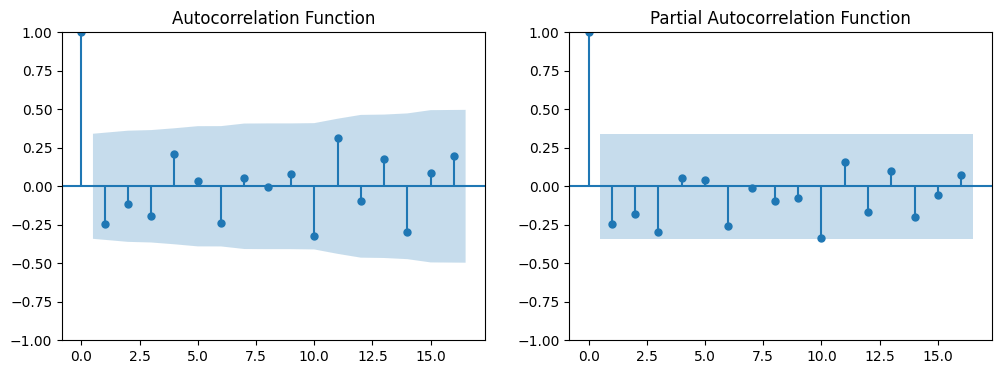

In [ ]:
# Plot ACF and PACF side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ACF plot
plot_acf(sales_BU3_diff2, ax=axes[0])
axes[0].set_title('Autocorrelation Function')

# PACF plot
plot_pacf(sales_BU3_diff2, ax=axes[1])
axes[1].set_title('Partial Autocorrelation Function')

plt.show()

Comment:

ACF Plot:  We can estimate 1 MA terms, since we have lag 1 out of the confidence interval, and lag 2 is in the blue area.

PACF Plot: looking at the PACF plot above, we can estimate to use 1 AR terms for our model, since lag is in the blue area.


max.p=2: PACF cuts off after lag 1, suggesting AR(1). Chosen p=2

max.q=2: ACF cuts off after lag 1, suggesting MA(1). Chosen q=2

max.P=1: There is no hint of seasonality so P and Q are choosen to be 0.

max.Q=1: There is no hint of seasonality so P and Q are choosen to be 0.

The auto_arima function uses a stepwise search algorithm to find the best model. In this way, the algorithm can more effectively explore the parameter space. Using p and q = 2  allows for more efficient exploration.

In [ ]:
model_BU1 = pm.auto_arima(sales_BU1, max_p=2, max_q=2, d=2, seasonal=True, trace=True)
model_BU1.params()
model_BU1.aic()

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=1.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=114.413, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=116.409, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=116.405, Time=0.30 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.80 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=116.413, Time=0.03 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 2.297 seconds


114.41307724217029

In [ ]:
model_BU1.params()

sigma2    1.765744
dtype: float64

In [ ]:
model_BU1.aic()

114.41307724217029

In [ ]:
model_BU2 = pm.auto_arima(sales_BU2, max_p=2, max_q=2, d=2, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.37 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=64.676, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=64.708, Time=0.14 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=62.758, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 2.923 seconds


In [ ]:
model_BU2.params()

sigma2    0.369086
dtype: float64

In [ ]:
model_BU2.aic()

62.758437325190854

In [ ]:
model_BU3 = pm.auto_arima(sales_BU3, max_p=2, max_q=2, d=2, seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=5.89 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=20.392, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=20.371, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=18.836, Time=0.21 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=18.546, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 6.913 seconds


In [ ]:
model_BU3.params()

sigma2    0.09667
dtype: float64

In [ ]:
model_BU3.aic()

18.54588389900368

Diagnose the Residuals.

Checking the residuals of the fitted model to ensure they resemble white noise. This involves examining the ACF and PACF plots of the residuals and conducting the statistical Box-Pierce test.

In [ ]:
resi_BU1 = pd.Series(model_BU1.resid(),date_range)
acorr_ljungbox(resi_BU1, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,6.235923,0.012518,5.730308,0.016675
2,6.236374,0.044237,5.730709,0.056963
3,6.236464,0.100656,5.730788,0.125468
4,6.236464,0.182171,5.730788,0.220175
5,6.236464,0.283885,5.730788,0.333302
6,6.236895,0.397183,5.731125,0.453973
7,6.242878,0.511693,5.735653,0.570932


<Axes: >

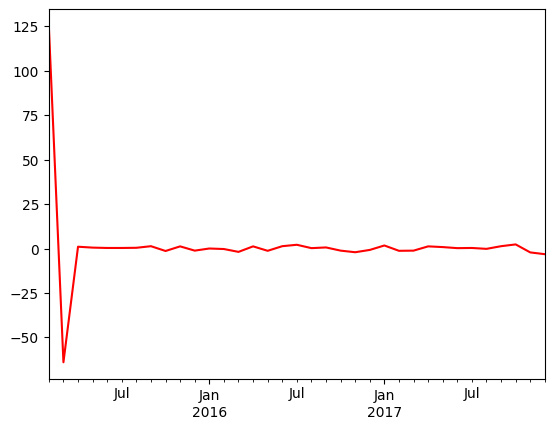

In [ ]:
resi_BU1.plot(color = 'red')

In [ ]:
resi_BU2 = pd.Series(model_BU2.resid(),date_range)
acorr_ljungbox(resi_BU2, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,6.029178,0.014071,5.540325,0.018583
2,6.029375,0.049061,5.540502,0.062646
3,6.030212,0.110150,5.541225,0.136194
4,6.030900,0.196852,5.541802,0.236079
5,6.031202,0.303195,5.542047,0.353357
6,6.031230,0.419701,5.542069,0.476387
7,6.031246,0.536106,5.542081,0.594113


<Axes: >

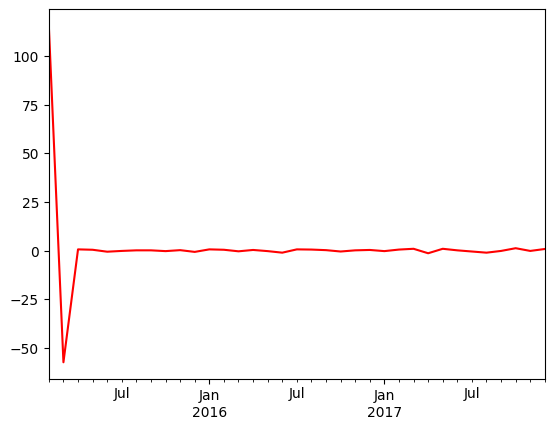

In [ ]:
resi_BU2.plot(color = 'red')

In [ ]:
resi_BU3 = pd.Series(model_BU3.resid(),date_range)
acorr_ljungbox(resi_BU3, lags=None, boxpierce=True)

,lb_stat,lb_pvalue,bp_stat,bp_pvalue
1,6.017372,0.014166,5.529477,0.018699
2,6.017446,0.049355,5.529543,0.062991
3,6.017814,0.110747,5.529861,0.136863
4,6.018356,0.197782,5.530315,0.237078
5,6.019157,0.304359,5.530965,0.354562
6,6.019719,0.420985,5.531406,0.477669
7,6.019740,0.537446,5.531421,0.595397


<Axes: >

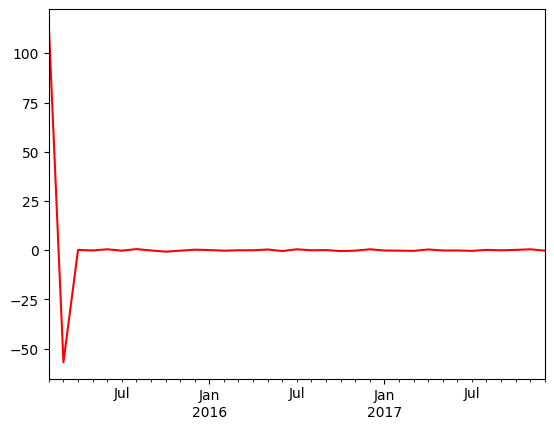

In [ ]:
resi_BU3.plot(color = 'red')

Comment: Since the p values > 0.05, the errors are assumed to be white noise.

Note: some p values are less than 0.05. We can consider to differentiate (differensing 3 times) one more time to have more accurate models.

# Question 5. Predict sales for each BU for January 2018, February 2018, March 2018

---

In [ ]:
model_BU1.predict(3)

2018-01-31    137.4
2018-02-28    135.8
2018-03-31    134.2
Freq: M, dtype: float64

In [ ]:
model_BU2.predict(3)

2018-01-31    132.2
2018-02-28    133.4
2018-03-31    134.6
Freq: M, dtype: float64

In [ ]:
model_BU3.predict(3)

2018-01-31    128.2
2018-02-28    128.9
2018-03-31    129.6
Freq: M, dtype: float64